<a href="https://colab.research.google.com/github/Vanisha2005/SCT_DS_3/blob/main/SCT_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install scikit-learn if not already installed
!pip install -q scikit-learn

# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import zipfile

zip_path = '/content/bank+marketing.zip'  # your file name
extract_path = '/content/bank_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files
import os
os.listdir(extract_path)




['bank.zip', 'bank-additional.zip']

In [ ]:
import zipfile

# Paths to inner ZIPs
inner_zips = ['/content/bank_data/bank.zip', '/content/bank_data/bank-additional.zip']

# Extract each inner ZIP
for zip_file in inner_zips:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall('/content/bank_data')

# Check what files we now have
import os
os.listdir('/content/bank_data')


['__MACOSX',
 'bank-full.csv',
 'bank.csv',
 'bank.zip',
 'bank-additional',
 'bank-names.txt',
 'bank-additional.zip']

In [ ]:
with zipfile.ZipFile('/content/bank_data/bank-additional.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/bank_data')


In [ ]:
df = pd.read_csv('/content/bank_data/bank-additional/bank-additional-full.csv', sep=';')
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()
df['y'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,count
y,
no,36548
yes,4640


In [ ]:
# Convert 'yes'/'no' to 1/0 in target column
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# One-hot encode categorical features
df_encoded = pd.get_dummies(df.drop('y', axis=1), drop_first=True)

# Add target column back
df_encoded['y'] = df['y']


In [ ]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Accuracy: 0.8868657441126487
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7303
           1       0.50      0.52      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.72      8238
weighted avg       0.89      0.89      0.89      8238



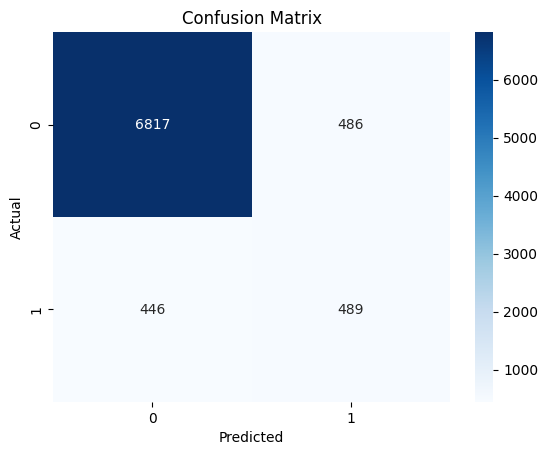

In [ ]:
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Compare predictions with actual labels
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy as a percentage
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 88.69%


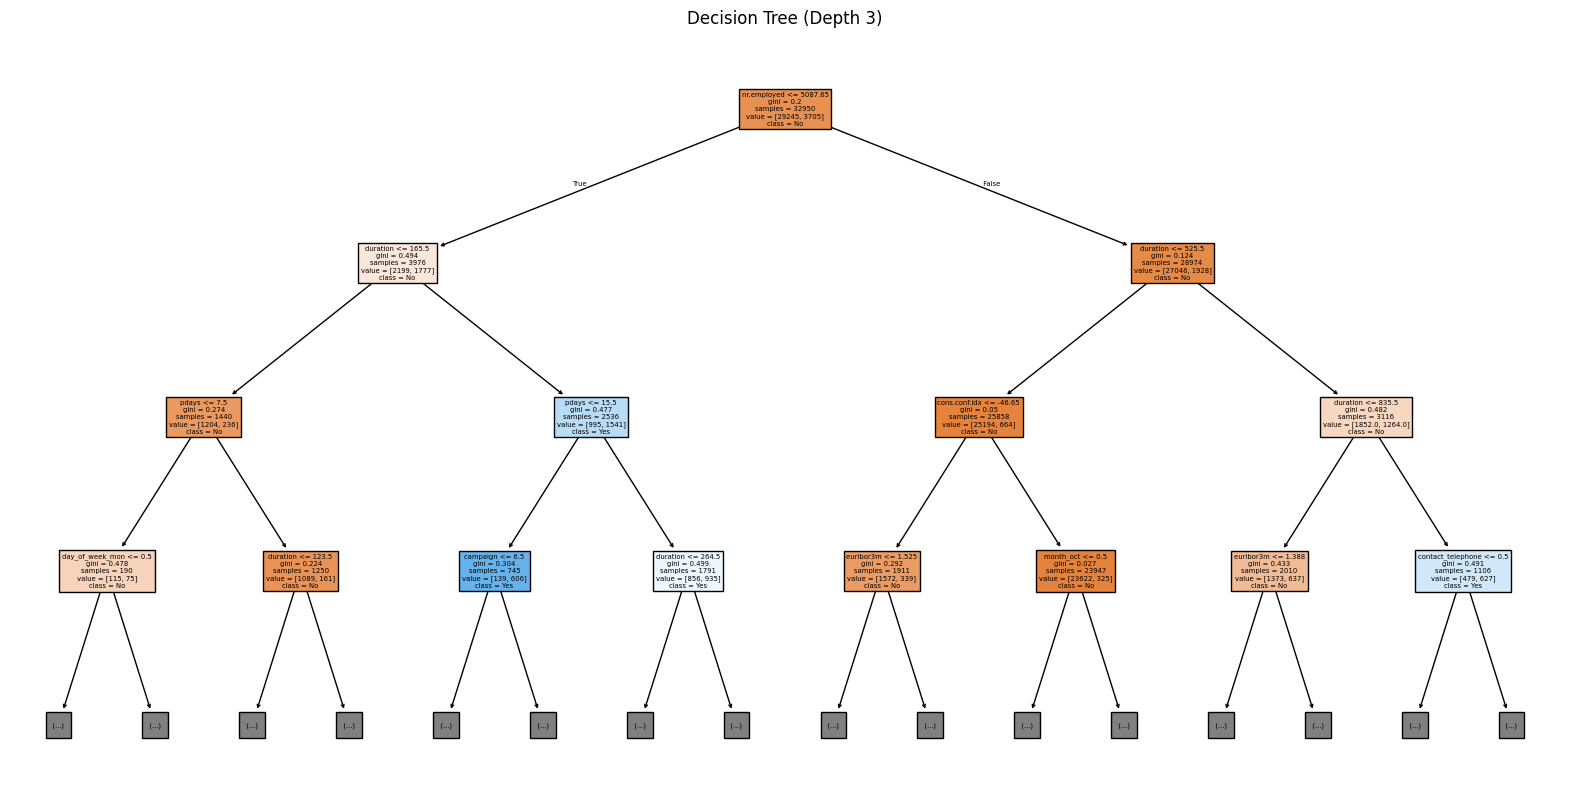

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["No", "Yes"], max_depth=3)
plt.title("Decision Tree (Depth 3)")
plt.show()


## 📝 Summary

- **Model**: Decision Tree Classifier
- **Target**: Will the customer purchase (subscribe to term deposit)?
- **Accuracy**: 88.69%
- **Key Factors**: Contact method, previous outcome, job, marital status
